# Сегментация пользователей банка «Метанпром» по потреблению

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка к анализу</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Матрица-корреляции" data-toc-modified-id="Матрица-корреляции-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Матрица корреляции</a></span></li><li><span><a href="#Сегментация-пользователей-банка" data-toc-modified-id="Сегментация-пользователей-банка-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сегментация пользователей банка</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-№1" data-toc-modified-id="Гипотеза-№1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Гипотеза №1</a></span></li><li><span><a href="#Гипотеза-№2" data-toc-modified-id="Гипотеза-№2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Гипотеза №2</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Рекомендации</a></span></li><li><span><a href="#Ссылка-на-презентацию-и-дашборд" data-toc-modified-id="Ссылка-на-презентацию-и-дашборд-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ссылка на презентацию и дашборд</a></span></li></ul></div>

# Описание проекта

Основной задачей проекта является анализ и сегментация клиентов регионального банка «Метанпром» по количеству потребляемых продуктов, с особым вниманием на отток пользователей. 
Заказчиком исследования является маркетинговый отдел банка, поэтому по итогам исследования будут созданы презентация с визуализацией полученных по итогам работы данных и дашборд для самостоятельной работы менеджеров банка.

Работа по сегментации пользователей продуктов банка уже проводилась ранее, но, вероятно, с того момента изменились клиенты банка и старая сегментация больше не работает. В этой связи наша работа над новой сегментацией должна предоставить менеджерам актуальную информацию о текущем состоянии дел в банке и подсветить проблемные моменты, которые можно улучшить для замедления оттока клиентов и улучшения общего клиентского сервиса.

В нашем распоряжении имеется датасет bank_dataset.csv, содержащий данные о клиентах банка «Метанпром». 
Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.


## Загрузка данных и подготовка к анализу

На данном этапе мы получим датасет и познакомимся с имеющимися данными. Изучим датасет на наличие пропусков и дубликатов, приведем название и содержимое столбцов к стилистически правильному написанию. Проверим датасет на наличе аномалий, исследуем пропуски и при их наличии попробуем изыскать возможности заменить их необходимыми значениями. Проверим соответствие типов данных содержимому столбцов.

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import seaborn as sns
import math as mth
import plotly.express as px
from IPython.display import display

In [2]:
try:
    df = pd.read_csv('_.csv')
except: 
    df = pd.read_csv('https:_.csv')

In [3]:
display(df)
df.info()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Типы данных соответствуют содержимому столбцов, замен не требуется. Но стоит немного поработать над стилем написания самих столбцов.

In [4]:
#приведение названий столбцов к строчному написанию
df.columns = df.columns.str.lower()

In [5]:
#приведение названий двух столбцов к стилю snake_case
df = df.rename(columns={'userid': 'user_id', 'creditcard': 'credit_card'})

In [6]:
#проверка содержимого столбца city на корректность и однородность написания названий городов
df['city'].value_counts()

#данные корректны

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

In [7]:
#проверка на наличие явныхдубликатов
print(f'Явных дубликатов в датафрейме: {df.duplicated().sum()}')

Явных дубликатов в датафрейме: 0


In [8]:
#проверим некоторые колонки на дубликаты, начнем с balance
df['balance'].value_counts()

105473.74    2
130170.82    2
109974.22    1
171653.17    1
108867.00    1
            ..
136525.99    1
130306.49    1
92895.56     1
132005.77    1
104001.38    1
Name: balance, Length: 6381, dtype: int64

В данном столбце замечено по 2 совпадающих до копейки значния баланса, посмотрим на полные данные таких клиентов, для исключения ошибок.

In [9]:
#Группировка строк по уникальным значениям столбца "balance"
balance_dplcts = df.groupby('balance')

duplicates_b = balance_dplcts.filter(lambda x: len(x) > 1)

# Вывод строк, содержащих дубликаты в столбце "balance"
display(duplicates_b)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
927,15676197,639,Ростов Великий,М,38,5,130170.82,1,1,1,149599.62,0
4961,15675257,689,Ростов Великий,М,45,0,130170.82,2,1,0,150856.38,0
9127,15686223,630,Рыбинск,М,39,10,105473.74,1,0,0,58854.88,1
9714,15724010,726,Рыбинск,Ж,56,2,105473.74,1,1,1,46044.70,0


Не смотря на полностью совпадающие суммы баланса, что само по себе выглядит несколько странно, тем не менее, это явно разные клиенты, поэтому оставляем данных пользователей в датасете.

In [10]:
#проверим на наличие дубликатов столбец estimated_salary
df['estimated_salary'].value_counts()

24924.92     2
109145.20    1
59755.14     1
1557.82      1
117202.19    1
            ..
37674.47     1
158043.11    1
103792.53    1
182266.01    1
155061.97    1
Name: estimated_salary, Length: 9999, dtype: int64

In [11]:
#Группировка строк по уникальным значениям столбца "balance"
salary_dplcts = df.groupby('estimated_salary')

duplicates_s = salary_dplcts.filter(lambda x: len(x) > 1)

# Вывод строк, содержащих дубликаты в столбце "balance"
display(duplicates_s)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
3176,15655750,722,Ростов Великий,М,29,1,107233.85,2,1,0,24924.92,0
3620,15806542,773,Ярославль,М,41,4,NaN,2,1,1,24924.92,0


В случае с оценочными зарплатами данное совпадение легче объяснить. Данные клиенты могут занимать одинаковые должности, одинаковое время, поэтому оценочная заработная плата так же может быть одинаковой. 

In [12]:
#переведем категориальные переменные гендера и города клиента в бинарные переменные для дальнейших рассчетов корреляции
df = pd.get_dummies(df)

In [13]:
#приведение названий новых сформированных столбцов к стилю всего датафрейма
df = df.rename(columns={'city_Ростов Великий': 'rostov', 'city_Рыбинск': 'rybinsk', 'city_Ярославль': 'yaroslavl', 'gender_Ж': 'f', 'gender_М': 'm'})
df

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov,rybinsk,yaroslavl,f,m
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,39,5,NaN,2,1,0,96270.64,0,0,0,1,0,1
9996,15612628,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,0,1
9997,15627268,709,36,7,NaN,1,0,1,42085.58,1,0,0,1,1,0
9998,15725091,772,42,3,75075.31,2,1,0,92888.52,1,1,0,0,0,1


In [14]:
#проверка на наличие пропусков
df.isna().sum()

user_id                0
score                  0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
rostov                 0
rybinsk                0
yaroslavl              0
f                      0
m                      0
dtype: int64

Вернемся к важному вопросу о пропусках в столбце balance. 

3617 пропусков это 36% датафрейма, внушителная сумма, чтобы оставить её без внимания.

Посмотрим на столбец во взаимосвязях с некоторыми соседними параметрами. Например с городом, количеством продуктов, оттоком, возрастом, полом.

In [15]:
df[df['balance'].isna()].groupby('rostov')['rostov'].count()

rostov
0    3617
Name: rostov, dtype: int64

In [16]:
df[df['balance'].isna()].groupby('rybinsk')['rybinsk'].count()

rybinsk
0    2418
1    1199
Name: rybinsk, dtype: int64

In [17]:
df[df['balance'].isna()].groupby('yaroslavl')['yaroslavl'].count()

yaroslavl
0    1199
1    2418
Name: yaroslavl, dtype: int64

Интересная ситуация в разрезе городов. В данных по Ростову вообще нет пропусков в балансе, в Рыбинске 1199 пропусков, а в Ярославле 2418. Вероятно имеет место различные методы заполнения этой графы в разных отделениях банка.

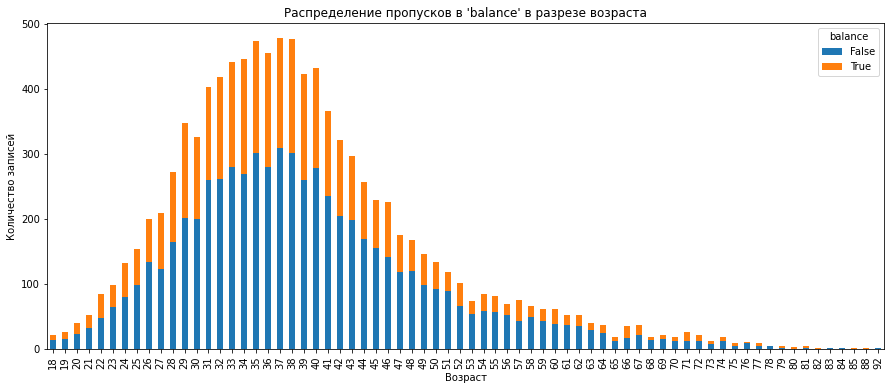

In [18]:
pivot_table = df.pivot_table(index='age', columns=df['balance'].isna(), values='user_id', aggfunc='count')
pivot_table = pivot_table.rename_axis('Возраст', axis=0)
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title("Распределение пропусков в 'balance' в разрезе возраста")
ax.set_xlabel("Возраст")
ax.set_ylabel("Количество записей")

# Построение графика
pivot_table.plot(kind='bar', stacked=True, ax=ax)

# Отображение графика
plt.show()

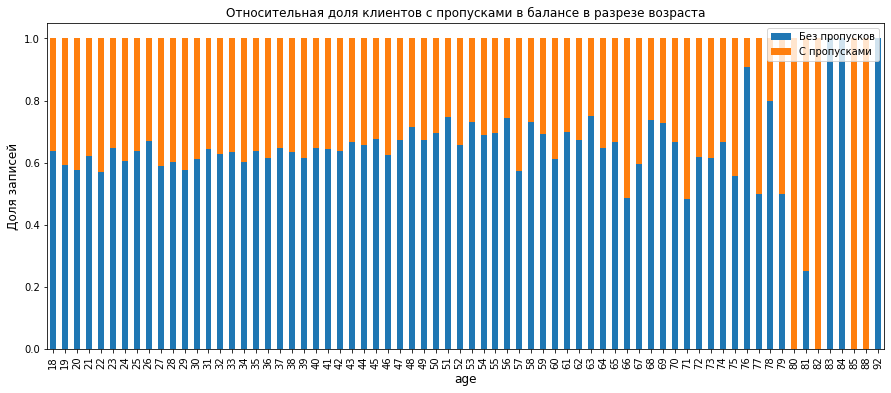

In [19]:
pivot_table1 = df.pivot_table(index='age', columns=df['balance'].isna(), values='user_id', aggfunc='count')
pivot_table1['Total'] = pivot_table1.sum(axis=1)

# Нормализация значений
normalized_table = pivot_table1.iloc[:, :-1].div(pivot_table1.Total, axis=0)

# Построение гистограммы
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title("Относительная доля клиентов с пропусками в балансе в разрезе возраста")
ax.set_xlabel("Количество продуктов", fontsize=12)
ax.set_ylabel("Доля записей", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

# Построение графика
normalized_table.plot(kind='bar', stacked=True, ax=ax, legend=False)
ax.legend(loc='upper right', labels=['Без пропусков', 'С пропусками'], fontsize=10)

# Отображение графика
plt.show()

Можно отметить, что количество пропусков в данных несколько растет для клиентов в диапазоне 26-46 лет. Но в целом соответствует распределению по всему датасету.

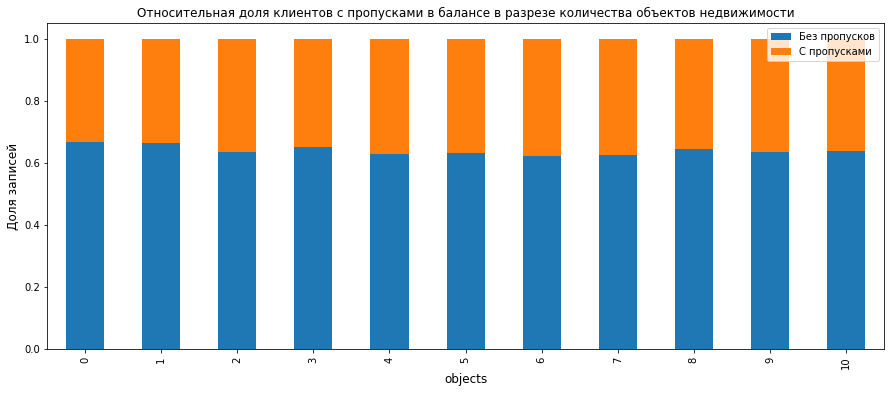

In [21]:
pivot_table2 = df.pivot_table(index='objects', columns=df['balance'].isna(), values='user_id', aggfunc='count')
pivot_table2['Total'] = pivot_table2.sum(axis=1)

# Нормализация значений
normalized_table = pivot_table2.iloc[:, :-1].div(pivot_table2.Total, axis=0)

# Построение гистограммы
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title("Относительная доля клиентов с пропусками в балансе в разрезе количества объектов недвижимости")
ax.set_xlabel("Количество продуктов", fontsize=12)
ax.set_ylabel("Доля записей", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

# Построение графика
normalized_table.plot(kind='bar', stacked=True, ax=ax, legend=False)
ax.legend(loc='upper right', labels=['Без пропусков', 'С пропусками'], fontsize=10)

# Добавление названий для столбцов
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
ax.set_xticklabels(labels)

# Отображение графика
plt.show()

В данном разрезе пропуски распределены так же равномерно.

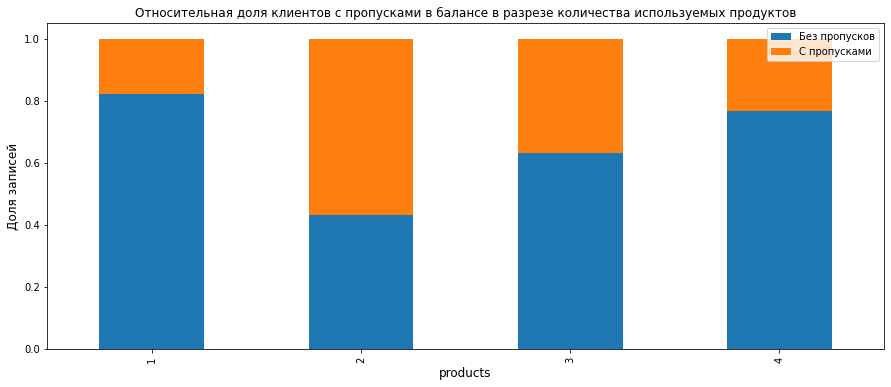

In [23]:
# Подсчет общего количества записей в каждой строке таблицы
pivot_table3 = df.pivot_table(index='products', columns=df['balance'].isna(), values='user_id', aggfunc='count')
pivot_table3['Total'] = pivot_table3.sum(axis=1)

# Нормализация значений
normalized_table = pivot_table3.iloc[:, :-1].div(pivot_table3.Total, axis=0)

# Построение гистограммы
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title("Относительная доля клиентов с пропусками в балансе в разрезе количества используемых продуктов")
ax.set_xlabel("Количество продуктов", fontsize=12)
ax.set_ylabel("Доля записей", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

# Построение графика
normalized_table.plot(kind='bar', stacked=True, ax=ax, legend=False, color=['#1f77b4', '#ff7f0e'])
ax.legend(loc='upper right', labels=['Без пропусков', 'С пропусками'], fontsize=10)

# Добавление названий для столбцов
labels = ['1', '2', '3', '4']
ax.set_xticklabels(labels)

# Отображение графика
plt.show()


Наибольшее число пропусков наблюдается у клиентов пользующихся 2 продуктами. 

Посмотрим как распределены пропуски у тех, кто пользуется кредитной картой и кто не пользуется.
Здесь значительный перевес у пользователей кредитки. Возможно это указывает нам на методологию рассчетов, по которой кредитные деньги не отображаются как депозитный баланс пользователя.

In [24]:
# Количество пользователей с кредитными картами с пропусками в столбце balance
has_credit_card = df[df['credit_card'] == 1]['balance'].isnull().sum()
no_credit_card = df[df['credit_card'] == 0]['balance'].isnull().sum()

print("Количество пользователей с пропусками в столбце balance:")
print("У пользователей с кредитной картой:", has_credit_card)
print("У пользователей без кредитной карты:", no_credit_card)

Количество пользователей с пропусками в столбце balance:
У пользователей с кредитной картой: 2592
У пользователей без кредитной карты: 1025


In [25]:
df[df['balance'].isna()].groupby('churn')['churn'].count()

churn
0    3117
1     500
Name: churn, dtype: int64

Пропуски преобладают у действующих клиентов, однако имеются и у некоторой части ушедших.

In [26]:
df[df['balance'].isna()].groupby('f')['f'].count()

f
0    1963
1    1654
Name: f, dtype: int64

In [27]:
df[df['balance'].isna()].groupby('m')['m'].count()

m
0    1654
1    1963
Name: m, dtype: int64

У мужчин незначительный перевес в количестве пропусков, но в целом определенной зависимости наличия пропусков от разных факторов так и не было выявлено. 
Рискнем предположить, что их наличие связано с кредитными продуктами банков, возможно в данном случае на дебетовом счете отображаются пропуски, которые логично можно заполнить только нулями. Кроме того, судя по тому, что в одном городе пропуски вообще отсутствуют, возможно проблема связана с различной методологией заполнения данного столбца данными в разных отделениях банка в разных городах.

Внесение рассчетных средних или медианных значений, для такой большой доли пропущенных данных может существенно исказить картину данных, как и замена пропусков 0 значениями. Оставляем данный столбец как есть и приступаем к исследовательскому анализу.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   objects           10000 non-null  int64  
 4   balance           6383 non-null   float64
 5   products          10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   loyalty           10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  rostov            10000 non-null  uint8  
 11  rybinsk           10000 non-null  uint8  
 12  yaroslavl         10000 non-null  uint8  
 13  f                 10000 non-null  uint8  
 14  m                 10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(5)
memory usage: 830.2 KB


In [30]:
display(df)

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov,rybinsk,yaroslavl,f,m
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,39,5,NaN,2,1,0,96270.64,0,0,0,1,0,1
9996,15612628,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,0,1
9997,15627268,709,36,7,NaN,1,0,1,42085.58,1,0,0,1,1,0
9998,15725091,772,42,3,75075.31,2,1,0,92888.52,1,1,0,0,0,1


### Вывод по разделу

Нами был получен датасет с 10000 записей о клиентах банка в 3 городах. Была проведена предобработка для проведения дальнейшего исследования. Датасет был проанализирован на целостность информации, были изучены дубликаты и пропуски, было произведено изучение и заполнение пропущенных значений в столбце balance. Была произведена замена написания столбцов датасета, на строчное написание, а так же написание приведено к стилю snace_case.  
Для удобства проведения дальнейшего исследования, категориальные переменные гендера и города клиента были переведены в бинарные переменные для дальнейших рассчетов корреляции. Таким образом в датасете появились 5 новых столбцов. С городом и полом клиента.

Данные обработаны и готовы к дальнешему анализу.

## Исследовательский анализ данных

In [31]:
df.describe().round(2)

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov,rybinsk,yaroslavl,f,m
count,10000.00,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,10000.0,10000.00,10000.00
mean,15733676.57,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.2,0.25,0.25,0.5,0.45,0.55
std,71936.19,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.4,0.43,0.43,0.5,0.50,0.50
min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.0,0.00,0.00,0.0,0.00,0.00
25%,15671264.25,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.0,0.00,0.00,0.0,0.00,0.00
50%,15733474.00,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.92,0.0,0.00,0.00,1.0,0.00,1.00
75%,15795969.75,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.0,1.00,0.00,1.0,1.00,1.00
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0,1.00,1.00,1.0,1.00,1.00


Опишем в общем виде имеющийся у нас датасет:
- Средний скоринговый балл - 650, при минимальном значении 350, а максимальном 850.
- Средний возраст клиентов банка ~39 лет. Самые юные клиенты приходят в банк с 18 лет, самый возрастной пользователь достиг возраста 92 года
- Среднее количество объектов в собственности составляет 5. При разбросе от 0, до 10. 
- Средний баланс на счету составляет 119827 что практически идентично медианному показателю - 119839. Максимальный остаток на счету составляет 250898.
- Среднее количество продуктов - 1.53. Медианный показатель всё же более объективен - 1 продукт. При 4 максимальных.
- Кредитная карта имеется у 71% пользователей банка
- 52% клиентов активные пользователи
- Средняя заработная плата клиентов банка составляет 100090. Максимальная составляет практически 200000, а в минимальных есть аномально низкие значения. Вероятно связанные с техническими ошибками при создании таблицы. Или нежеланием клиентов раскрывать свой действительный доход, а без зарплатного проекта в банке, эта информация может быть только справочной. В любом случае, это не повлияет на проведение анализа, поэтому оставим этот момент для будущих корректировок техническими специалистами банка.
- 20% клиентов покидают банк. В нашей таблице нет данных об этапе за который собраны имеющиеся данные, но сама по себе цифра внушительная и требует работы над удержанием клиентов. 
- По 25% клиентов банка проживают в Ростове Великом и Рыбинске
- 50% клиентов из Ярославля
- Гендерное распределение выглядит слегка смещенным в пользу мужчин 55%, против 45% женщин.


Подкрепим данные выводы визуализацией

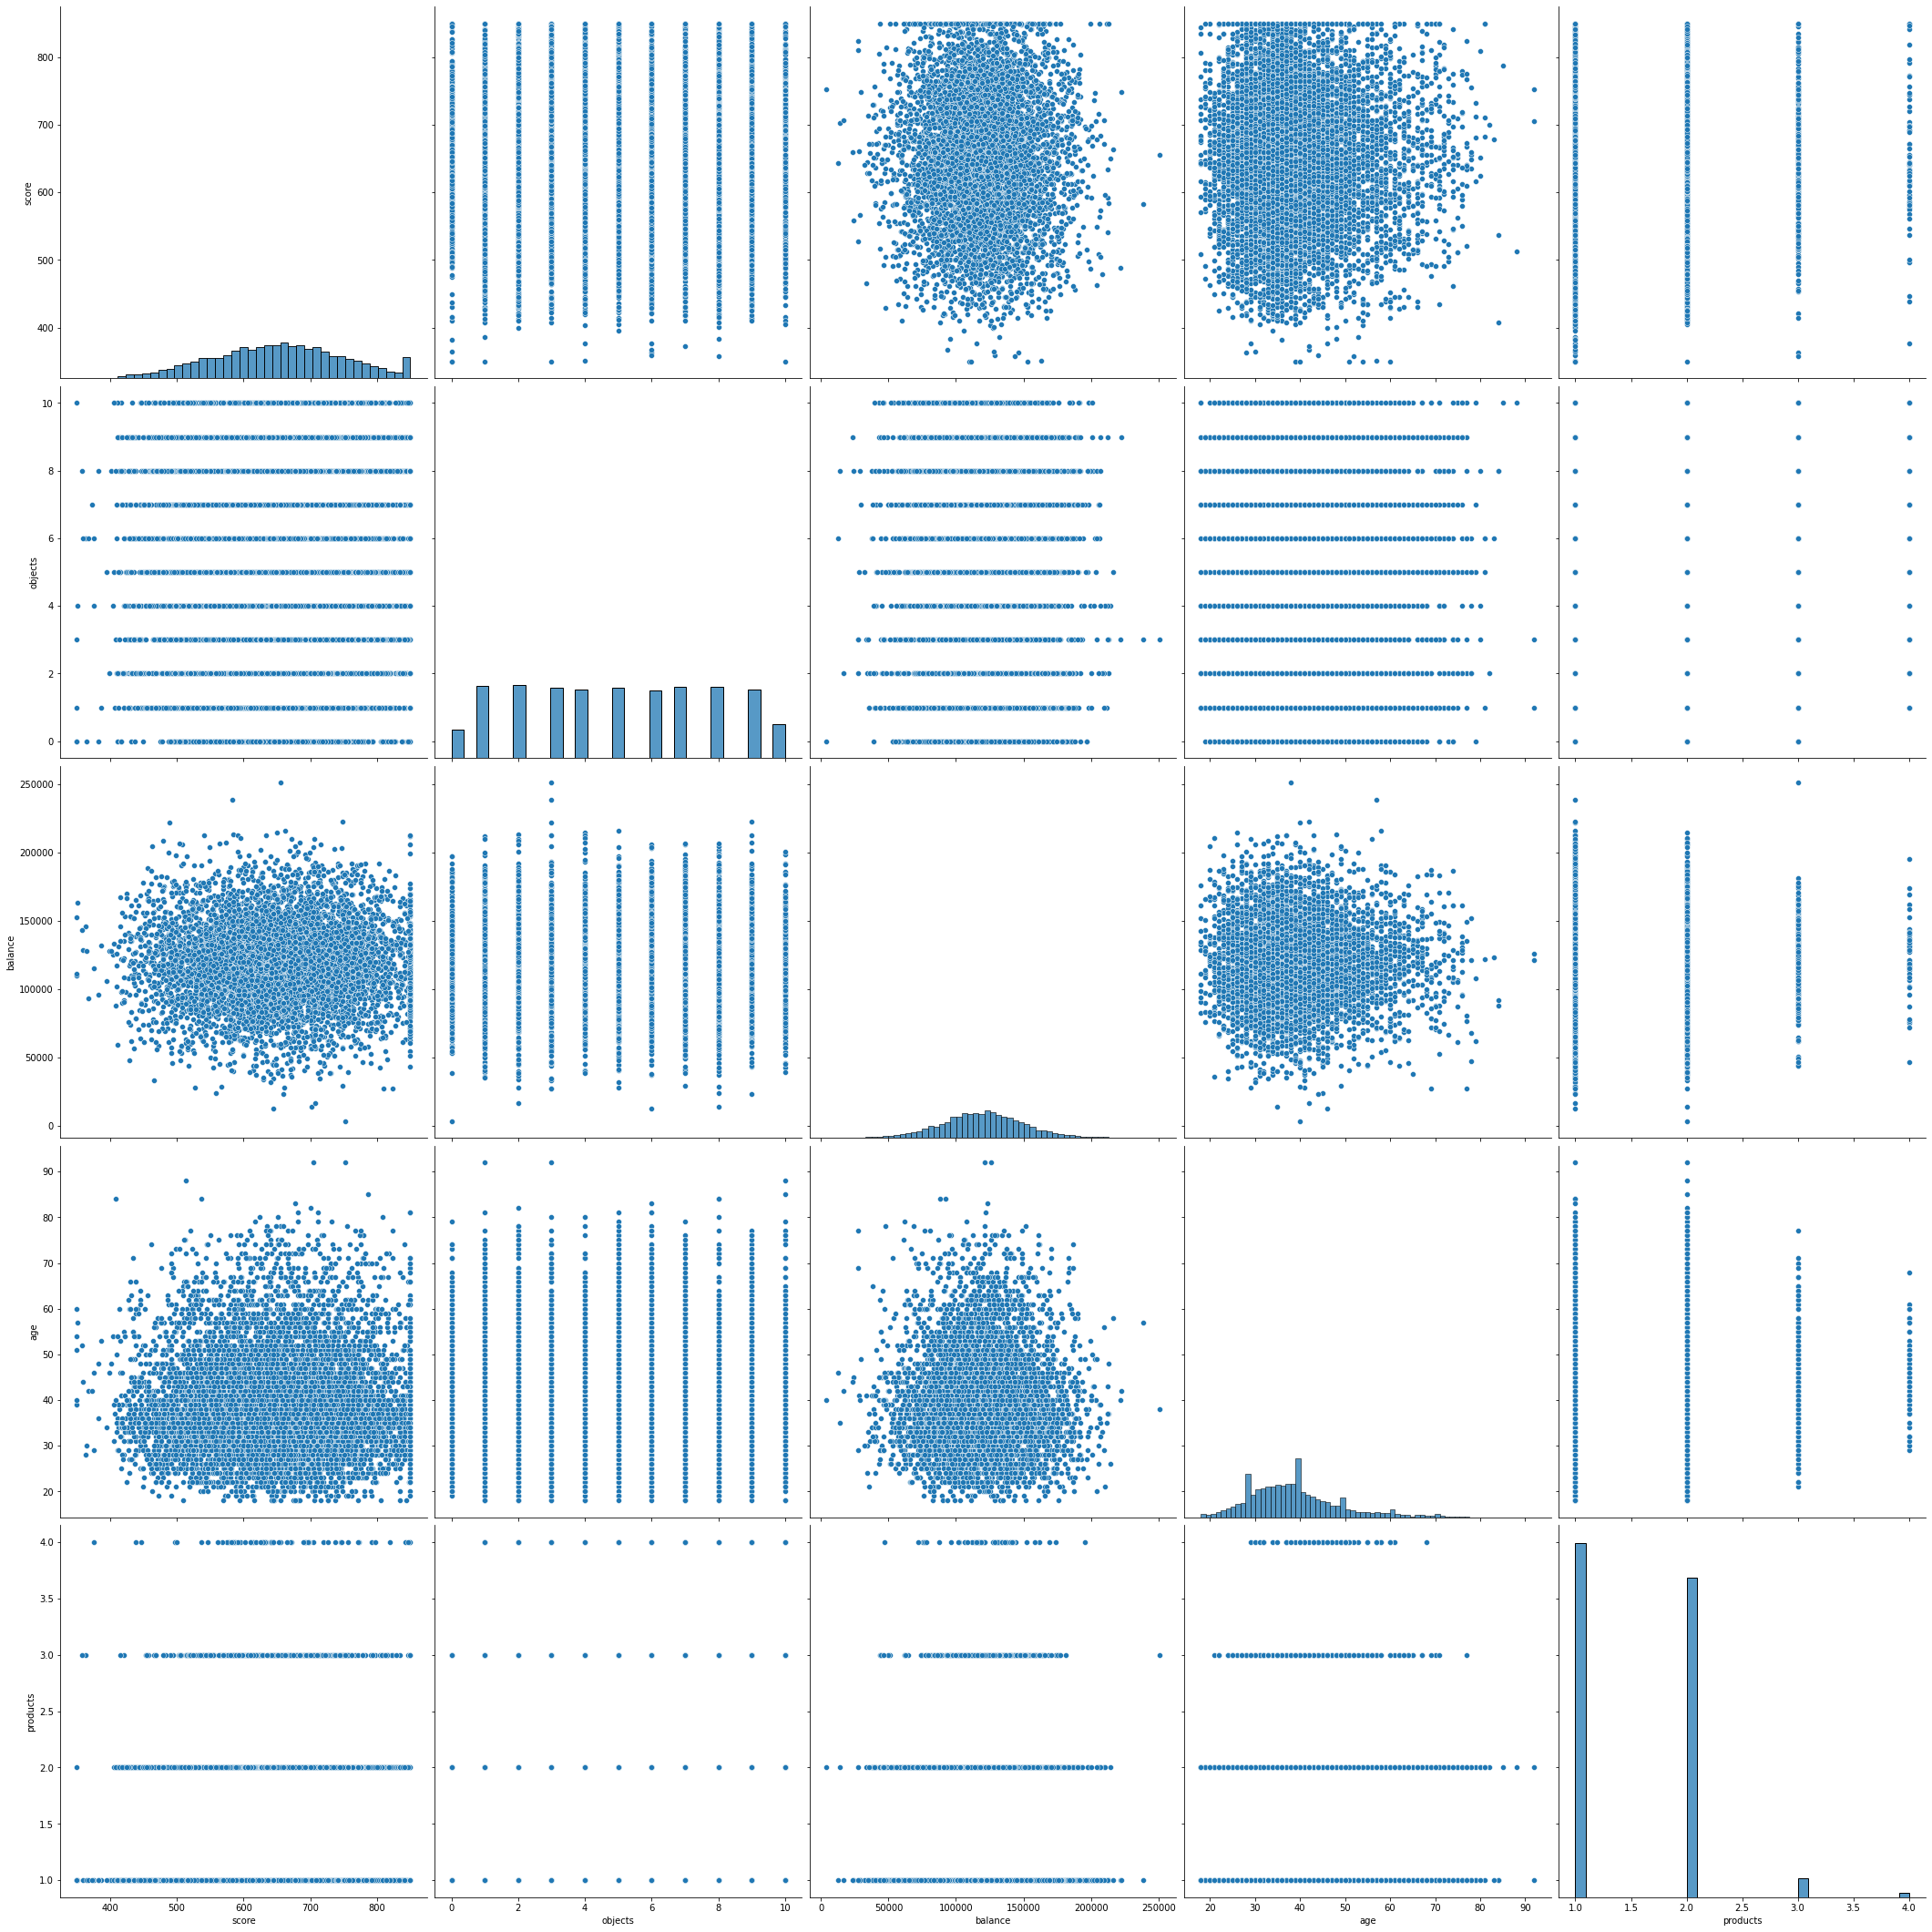

In [32]:
sns.pairplot(df, vars=['score', 'objects', 'balance', 'age', 'products'], height=6, palette="Set1")

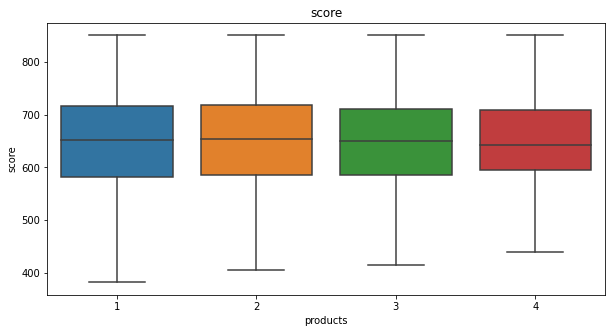

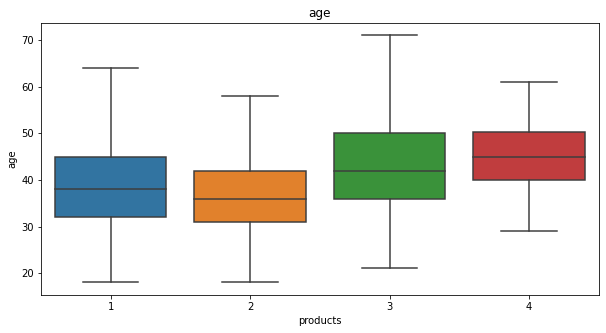

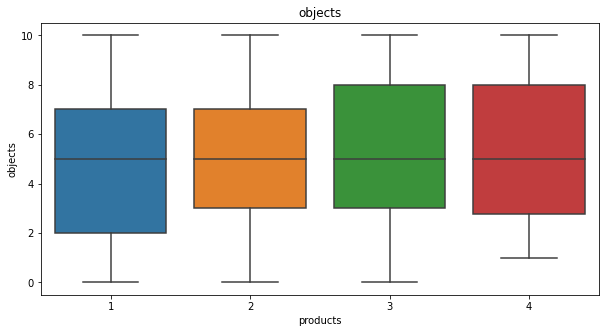

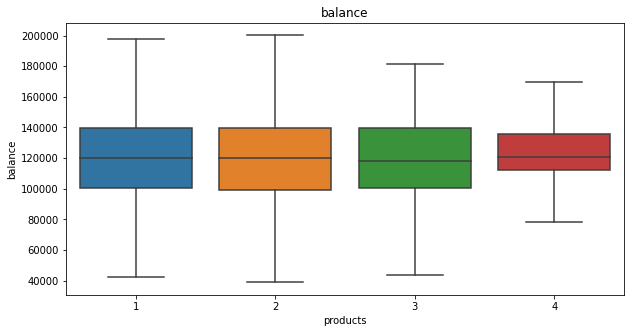

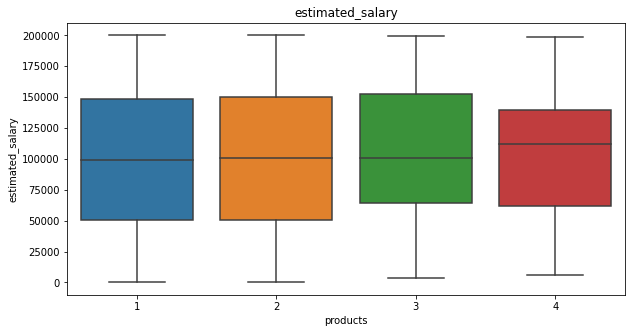

In [33]:
for col in ['score', 'age', 'objects', 'balance','estimated_salary']:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='products',y=col, data=df,showfliers=False).set_title(col)
    plt.show() 

Диаграммы размаха в разрезе числа продуктов у пользователя демонстрируют нам схожесть данных групп как по медианным значениям в разных рассмотренных условиях, так и в примерно схожей широте межквартильных интервалов. Показатели скоринга практически идентичны для каждой группы. 

Возраст подтверждает наш вывод о том, что пользователи 3 и 4 продуктов в среднем старше, чем 1 и 2.

Количество объектов чуть разнится у 1 группы, тут чаще встречаются пользователи с 2-3 объектами, в то время как в группах 3-4 число объектов доходит до 8, при том, что медианное значение у всех идентичное ~5.

Показатели баланса у 4 группы имеют более узкий разброс значений, но, вероятно, это связано с тем, что данная группа крайне малочислена. 

Показатели значений заработной платы в группах 3 и 4 имеют чуть большую нижнюю границу, что вполне логично, поскольку это клиенты более возрастные, более опытные, что как правило влечет за собой более высокий уровень доходов.

### Матрица корреляции

Построим матрицу корреляции для общего взгляда на датасет и поисков наглядных взаимосвязей в поведении клиентов.

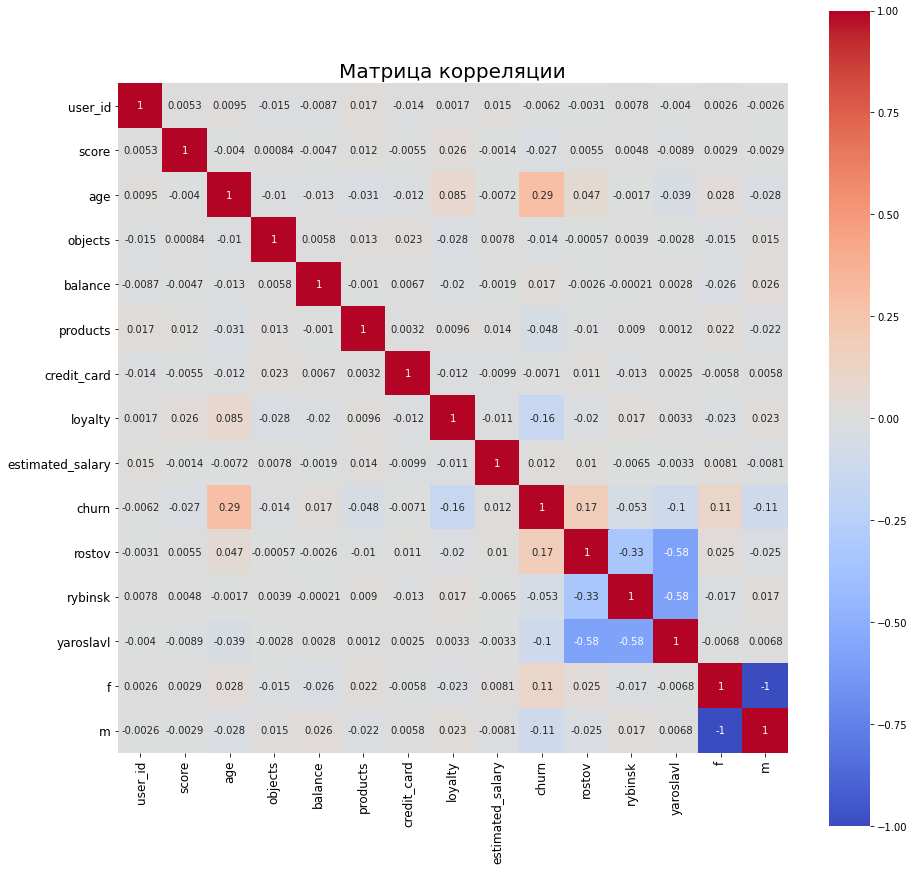

In [34]:
matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(matrix, annot=True, square=True, cmap='coolwarm', xticklabels=matrix.columns, yticklabels=matrix.columns)
plt.title('Матрица корреляции', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Наивысший уровень корреляции в нашем датафрейме демонстрирует взаимосвязь возраста и оттока клиентов - 29%, что по шкале Чеддока соответствует "очень слабой" корреляции. Так же хоть какое-то внимание привлекает к себе очень слабая корреляция оттока в Ростове Великом и оттока среди женщин. 

У всех остальных параметров уровень корреляции совсем незначительный.

### Сегментация пользователей банка

Из имеющегося в нашем распоряжении датасета мы можем извлечь информацию о количестве продуктов банка, которыми пользуются наши клиенты и на основании этой информации посмотреть детальнее какие формируются сегменты по потреблению и как эти сегменты подвержены оттоку из банка. И именно по этому признаку мы будем проводить сегментацию, поскольку это именно тот параметр, на который мы можем стараться влиять и который зависит от работы менеджеров банка.

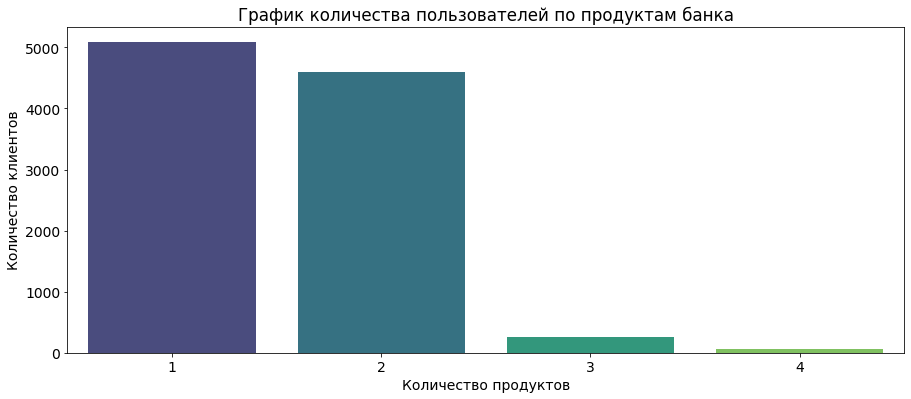

In [35]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (15,6)

sns.countplot(x='products', data=df, palette='viridis')
plt.title('График количества пользователей по продуктам банка')
plt.xlabel('Количество продуктов') 
plt.ylabel('Количество клиентов');

Как мы уже заметили ранее, подавляющее большинство клиентов пользуются 1, или 2 продуктами банка. Посмотрим на профили данных пользоваетелей под разными углами.

In [36]:
df.groupby('products').mean().round(2)

,user_id,score,age,objects,balance,credit_card,loyalty,estimated_salary,churn,rostov,rybinsk,yaroslavl,f,m
products,,,,,,,,,,,,,,
1,15732367.90,649.12,39.67,4.97,119894.16,0.70,0.50,99487.26,0.28,0.27,0.24,0.49,0.45,0.55
2,15734841.49,652.19,37.75,5.05,119660.94,0.71,0.53,100452.01,0.08,0.23,0.26,0.52,0.45,0.55
3,15741816.49,648.11,43.20,5.00,119475.69,0.71,0.42,104318.13,0.83,0.36,0.25,0.39,0.56,0.44
4,15719361.27,653.58,45.68,5.30,122260.61,0.68,0.48,104763.72,1.00,0.40,0.12,0.48,0.63,0.37


Опишем имеющуюся информацию текстом, а затем визуализируем. Мы видим, что пользователи всех 4 сегментов имеют схожий средний скоринговый рейтинг, колеблющийся в районе 650. 

Средний возраст пользователей 1 и 2 продуктов чуть моложе 37-39 лет, против 43-45 у пользователей 3-4. 
Уровень наличия кредитных карт у всех пользователей примерно одинаков и находится в диапазоне 68-71%. 

Активность клиентов несколько разнится, наболее активны пользователеи 2 продуктов, наименее активны владельцы 3 продуктов банка.

Средние зарплаты очень близки по всем группам.

Баланс клиента тоже. Средние остатки на счетах разнятся незначительно и составляют ~ 119500, только пользователи 4 продуктов чуть выбиваются, у них этот показатель чуть выше - 122260.

Гендерно пользователи распределились таким образом, в 1 и 2 группе преобладают мужчины - по 55%, а вот 3 и особенно 4 продуктами чаще пользуются женщины - 56 и 63% соотвественно. 

По городам всё распределено примерно равномерно. Немногочисленные пользователи 4 продуктов чаще встречаются в Ростове и Ярославле, и почти отсуствуют в Рыбинске (только 12%). Примерно такая же ситуация и с пользователями 3 продуктов, только проценты уже не так далеко разбегаются от города к городу. Процент пользователей 1 и 2 продуктов распределн по городам примерно равномерно. 

И один из важнейших для нас параметров - отток клиентов. 
Наиболее стабильны - пользователи 2 продуктов, здесь отток составляет только 8%, а вот ситуация с пользователями 3 и особенно 4 продуктов просто катастрофична. Из этих категорий уходят 83% и 100% соотвественно.

Визуализируем описанные тезисы для дальнейшего представления данных менеджерам банка

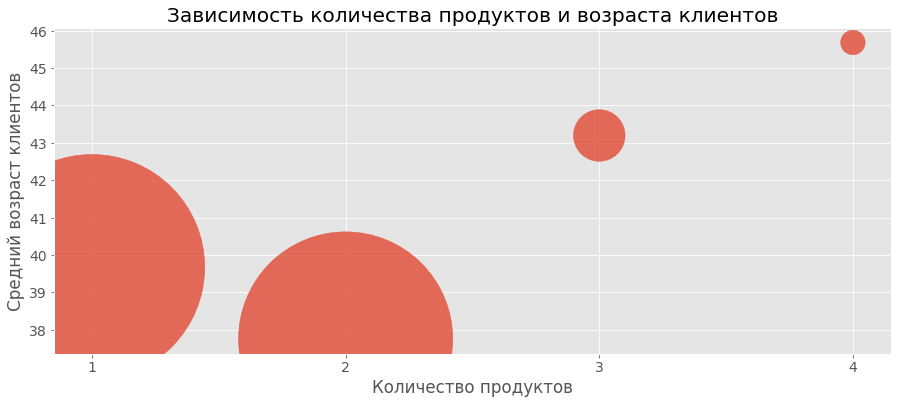

In [37]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (15,6)

# Группируем данные по количеству продуктов и считаем средний возраст клиентов и количество клиентов в каждой группе
products_age = df.groupby('products').agg({'age': 'mean', 'user_id': 'count'})

# Отрисовываем scatter plot
plt.scatter(products_age.index, products_age['age'], s=products_age['user_id']*10, alpha=0.8)
plt.title('Зависимость количества продуктов и возраста клиентов')
plt.xlabel('Количество продуктов')
plt.ylabel('Средний возраст клиентов')
plt.xticks(range(1, 5))
plt.show()

Пользователи 3 и 4 продуктов более возрастные.

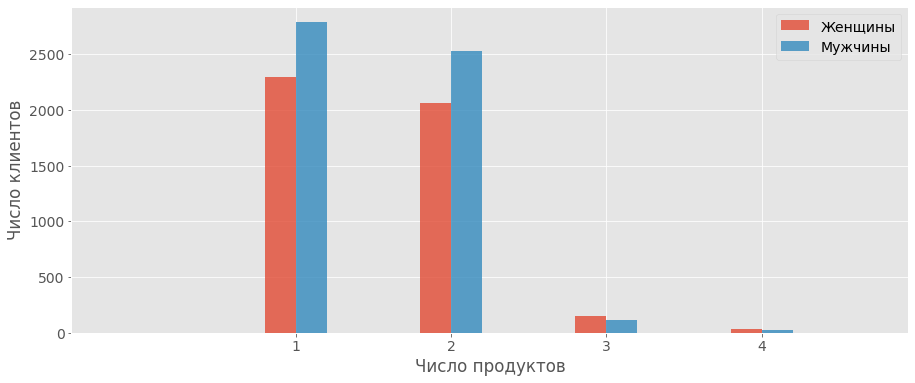

In [38]:
plt.hist([df[df['f']==1]['products'], df[df['m']==1]['products']], range=(0, 5), alpha=0.8, label=['Женщины', 'Мужчины'], align='left')
plt.legend()
plt.xticks(range(1,5))
plt.xlabel('Число продуктов')
plt.ylabel('Число клиентов')
plt.show()

Гендерное распределение пользователей. 1 и 2 продуктами чуть чаще пользуются мужчины. 3 и 4 - женщины.

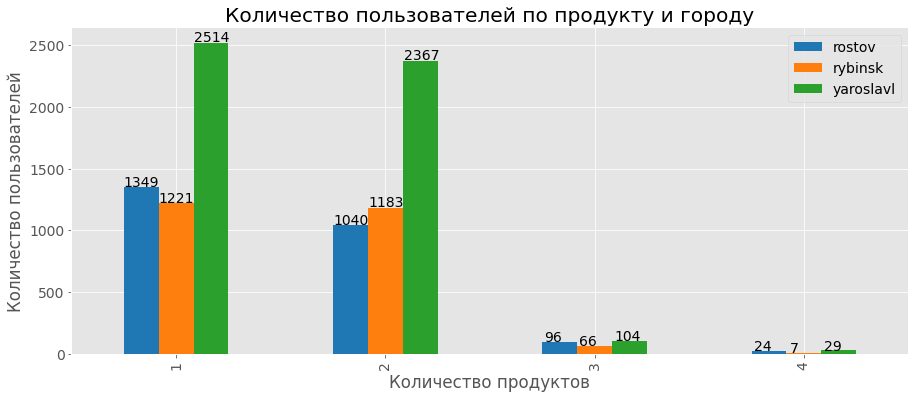

In [39]:
ax = df.groupby('products')[['rostov', 'rybinsk', 'yaroslavl']].sum().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Количество пользователей по продукту и городу')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество пользователей')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show();

In [40]:
city_totals = df[['rostov', 'rybinsk', 'yaroslavl']].sum()
city_percentages = city_totals / city_totals.sum()

product_city_df = df.groupby('products')[['rostov', 'rybinsk', 'yaroslavl']].sum()
product_city_percentages = product_city_df.div(city_totals, axis=1)

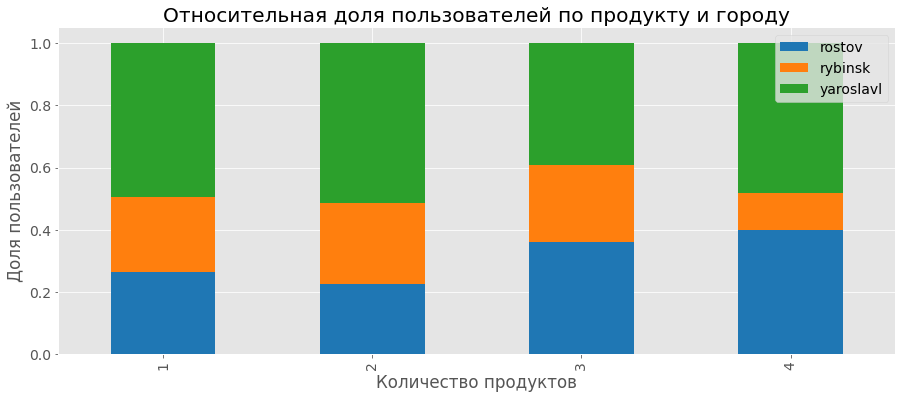

In [41]:
product_city_df = product_city_df.apply(lambda row: row / row.sum(), axis=1)

# Отрисовать столбчатую диаграмму
ax = product_city_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Относительная доля пользователей по продукту и городу')
plt.xlabel('Количество продуктов')
plt.ylabel('Доля пользователей')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();

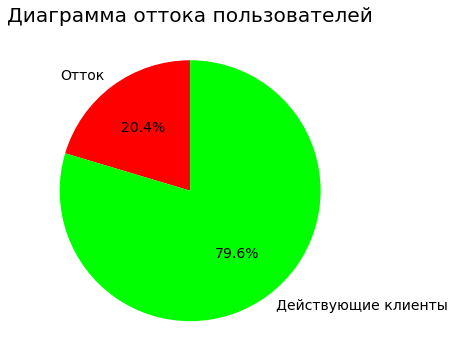

In [42]:
# Подсчет количества пользователей в оттоке
churn_count = df['churn'].sum()

# Подсчет количества пользователей не в оттоке
non_churn_count = df.shape[0] - churn_count

# Составление списка значений для диаграммы
values = [churn_count, non_churn_count]

# Составление списка меток для диаграммы
labels = ['Отток', 'Действующие клиенты']

# Отрисовка диаграммы
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF0000', '#00FF00'])
plt.title('Диаграмма оттока пользователей')
plt.show()

20% клиентов уходят из банка, визуализируем это распределение по количеству используемых продуктов.

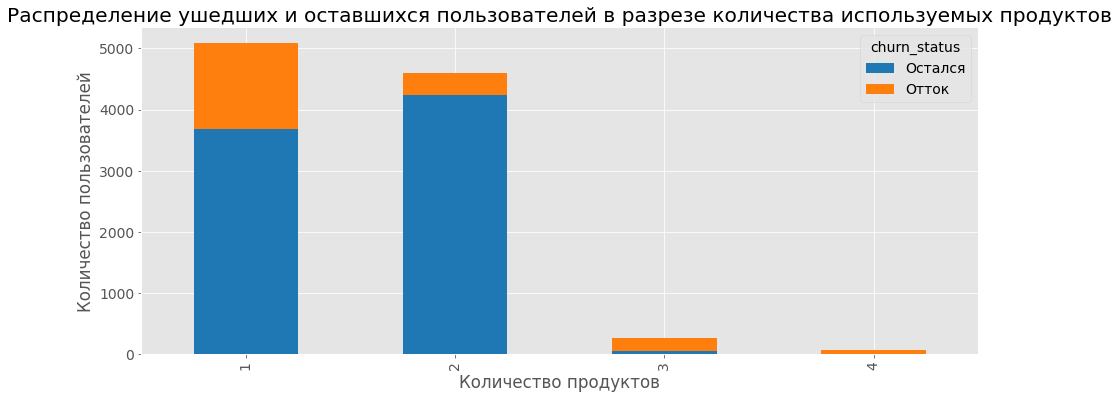

In [43]:
# Создаем новый столбец 'churn_status'
df['churn_status'] = df['churn'].apply(lambda x: 'Отток' if x == 1 else 'Остался')

# Группируем по столбцам 'products' и 'churn_status'
grouped_df = df.groupby(['products', 'churn_status']).size().unstack(fill_value=0)

# Отрисовываем столбчатую диаграмму
ax = grouped_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Распределение ушедших и оставшихся пользователей в разрезе количества используемых продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество пользователей')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();


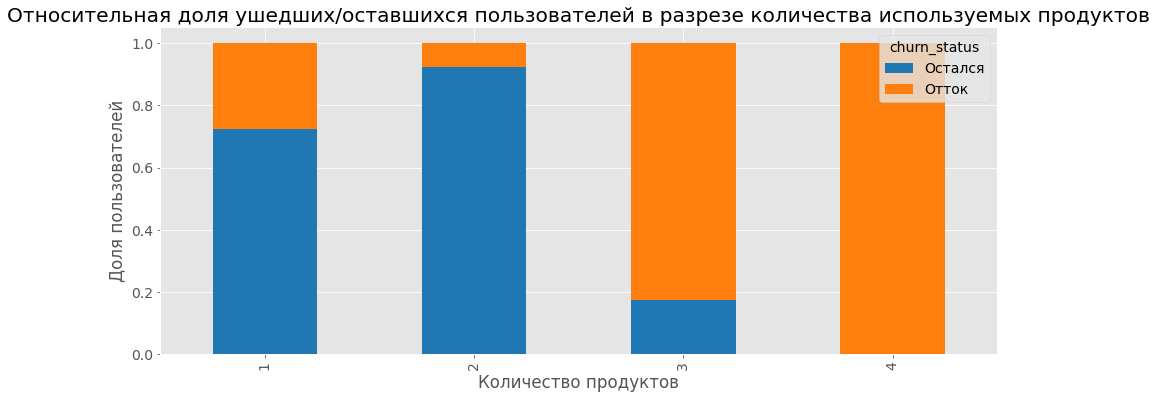

In [44]:
# Делим каждое значение в строке на сумму значений в этой строке
grouped_df = grouped_df.apply(lambda row: row / row.sum(), axis=1)

# Отрисовываем столбчатую диаграмму
ax = grouped_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Относительная доля ушедших/оставшихся пользователей в разрезе количества используемых продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Доля пользователей')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();

Крайне наглядная визуализация катастрофической ситуации у пользователей с 3 и 4 продуктами. Клиенты добравшиеся до 4 продуктов банка уходят гарантированно. Возможно это связано с тем, что попробовав все продукты и не найдя то, что им нужно, люди уходят в другой, более подходящий под их запросы банк.

Поскольку средние значения скоринговых баллов, уровень наличия кредитных карт, объектов в собственности, средних зарплат, находтся на весьма близком уровне. Мы решили не перегружать исследодование иллюстрациями крайне похожих параметров. Переходим к выводам по разделу.

### Вывод по разделу

На основе проведенного исследовательского анализа данных мы можем выделить и кратко описать 4 сегмента пользователей банка. 2 относительно стабильных и 2 проблемных. Начнем по порядку:

- Пользователи с 1 продуктом банка. Это чуть чаще мужчины ~40 лет, со средним скоринговым счетом 649. Владельцы 5 объектов недвижимости и средней зарплатой около 100000 и примерно таким же средним балансом на счетах - 119894. Эта категория наиболее многочисленна, и при этом имеет тревожный уровень оттока в 28%. Стоит сосредоточиться на выяснении причин данного негативного явления и внедрения мероприятий страхующих банк от такого решения клиентов. Данная категория равномерно распределена по всем города присутствия банка.


- Пользователи с 2 продуктами банка. Это наиболее лояльная категория, отток всего 8%. Здесь так же слегка преобладают мужчины (55%), средний возраст около 38 лет, отличаются большей активностью и практически идентичными остатками на счетах - 119660. Средний скоринговый счет, количество объектов недвижимости и средний уровень доходов примерно идентичны первой категории. Данная категория так же равномерно распределена по всем города присутствия банка.


- Пользователи с 3 продуктами банка. А вот данная категория уже ступенчато отличается от двух предыдущих. Во первых, это гораздо менее распространенная категория, здесь всего 266 клиентов (против 4-5 тысяч в первых двух категориях). Здесь преобладают женщины, средний возраст так же растет - 43 года. Кроме того, данная категория клиентов демонстрирует наихудшую активность. И главное - катастрофические цифры оттока - 83% пользователей данной категории, ушли.


- Пользователи с 4 продуктами банка. Самая малочисленная категория клиентов - всего 60 человек. Здесь уже существенное количественное превосходство женщин - 63% и еще более высокий средний возраст. 45+ лет. Данная категория владеет чуть большим количеством объектов недвижимости, чем прочие, имеет высший показатель доходов поступающих на счет - 104763 и самый высокий средний показатель баланса - 122260. Но, самое главное, вся эта категория пользователей уходит из банка - 100% оттока. Абсолютно катастрофическое значения. Стоит так же обратить внимание на то, что таких клиинетов практически нет в Рыбинске. Возможно стоит изучить опыт работы отделений в этом городе. 

## Проверка гипотез

### Гипотеза №1

Проверим гипотезу о различии возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

<b>H0:</b> Возраст клиентов пользующихся одним и двумя продуктами - равный

<b>H1:</b> Возраст клиентов пользующихся одним и двумя продуктами банка отличается


Зададим уровень статистической значимости - 0.05

In [45]:
age_1_products = df[df['products'] == 1]['age']
age_2_products = df[df['products'] == 2]['age']

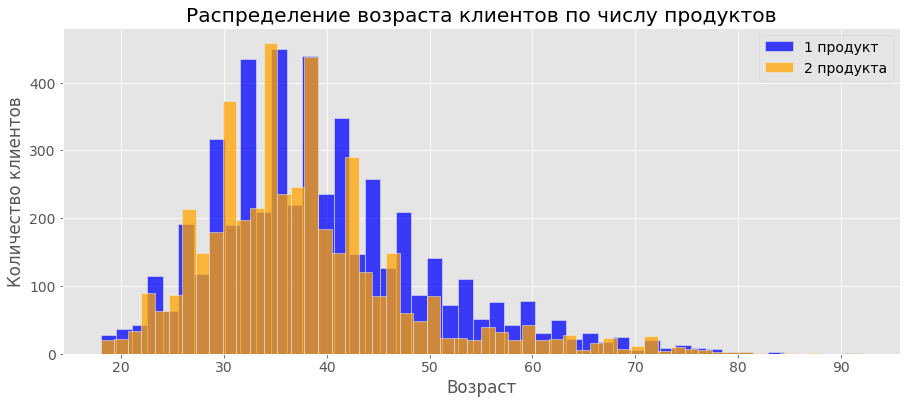

In [46]:
sns.histplot(age_1_products, kde=False, color='blue', label='1 продукт')
sns.histplot(age_2_products, kde=False, color='orange', label='2 продукта')
plt.legend()
plt.title('Распределение возраста клиентов по числу продуктов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

Проверим распределение полученных выборок на нормальность. Используем для этого тест Шапиро-Уилка.

<b>H0:</b> Распределение выборок является нормальным.

<b>H1:</b> Распределение выборок не является нормальным.

In [47]:
# Проверяем нормальность распределения выборок
stat_1, p_1 = shapiro(age_1_products)
stat_2, p_2 = shapiro(age_2_products)

display(f'p-value для первой выборки: {p_1}')
display(f'p-value для второй выборки: {p_2}')

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


'p-value для первой выборки: 9.106582681074756e-37'

'p-value для второй выборки: 7.286752014489049e-44'

Значения p-value больше 0.05, мы можем считать распределения выборок нормальными.

In [48]:
alpha = 0.05

t_stat, p_value = ttest_ind(age_1_products, age_2_products)

display('p-значение:',  p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

1.730821607368763e-19

Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу - возраст клиентов пользующихся одним и двумя продуктами банка имеет статистически значимые различия.

### Гипотеза №2

<b>H0:</b> Показатели оттока между мужчинами и женщинами равны.

<b>H1:</b> Показатели оттока между мужчинами и женщинами различаются.

In [49]:
churn_male = df[df['m'] == 1]['churn']
churn_female = df[df['f'] == 1]['churn']

In [50]:
from statsmodels.stats.proportion import proportion_confint

count1 = df[df['m'] == 1]['churn'].sum()  # число оттоков в группе мужчин
count2 = df[df['f'] == 1]['churn'].sum()  # число оттоков в группе женщин
nobs1 = len(df[df['m'] == 1])  # общее число наблюдений в группе мужчин
nobs2 = len(df[df['f'] == 1])  # общее число наблюдений в группе женщин

# расчет доверительных интервалов для долей
confint1 = proportion_confint(count1, nobs1, alpha=0.05, method='normal')
confint2 = proportion_confint(count2, nobs2, alpha=0.05, method='normal')

print('Доверительный интервал для доли оттока в группе мужчин:', confint1)
print('Доверительный интервал для доли оттока в группе женщин:', confint2)

Доверительный интервал для доли оттока в группе мужчин: (0.15472165980308833, 0.1743969035100874)
Доверительный интервал для доли оттока в группе женщин: (0.2381119020429312, 0.26331887057428205)


In [51]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([count1, count2])
nobs = np.array([nobs1, nobs2])

# вычисление статистики и p-value
stat, pval = proportions_ztest(count, nobs)

print('p-value:', pval)

if pval < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value: 1.720414987484119e-26
Отвергаем нулевую гипотезу


В данном случае так же отвергаем нулевую гипотезу. Показатели оттока между мужчинами и женщинами имеют статистические различия.

## Выводы

Нами был получен датасет с 10000 записей о клиентах банка в 3 городах. Была проведена предобработка для проведения дальнейшего исследования. Датасет был проанализирован на целостность информации, были изучены дубликаты и пропуски, было произведено изучение и заполнение пропущенных значений в столбце balance. Была произведена замена написания столбцов датасета, на строчное написание, а так же написание приведено к стилю snace_case.
Для удобства проведения дальнейшего исследования, категориальные переменные гендера и города клиента были переведены в бинарные переменные для дальнейших рассчетов корреляции. Таким образом в датасете появились 5 новых столбцов. С городом и полом клиента.

Опишем в общем виде имеющийся у нас датасет:
- Средний скоринговый балл - 650, при минимальном значении 350, а максимальном 850.
- Средний возраст клиентов банка ~39 лет. Самые юные клиенты приходят в банк с 18 лет, самый возрастной пользователь достиг возраста 92 года
- Среднее количество объектов в собственности составляет 5. При разбросе от 0, до 10. 
- Средний баланс на счету составляет 119827 что практически идентично медианному показателю - 119839. Максимальный остаток на счету составляет 250898.
- Среднее количество продуктов - 1.53. Медианный показатель всё же более объективен - 1 продукт. При 4 максимальных.
- Кредитная карта имеется у 71% пользователей банка
- 52% клиентов активные пользователи
- Средняя заработная плата клиентов банка составляет 100090. Максимальная составляет практически 200000, а в минимальных есть аномально низкие значения. Вероятно связанные с техническими ошибками при создании таблицы. Или нежеланием клиентов раскрывать свой действительный доход, а без зарплатного проекта в банке, эта информация может быть только справочной. В любом случае, это не повлияет на проведение анализа, поэтому оставим этот момент для будущих корректировок техническими специалистами банка.
- 20% клиентов покидают банк. В нашей таблице нет данных об этапе за который собраны имеющиеся данные, но сама по себе цифра внушительная и требует работы над удержанием клиентов. 
- По 25% клиентов банка проживают в Ростове Великом и Рыбинске
- 50% клиентов из Ярославля
- Гендерное распределение выглядит слегка смещенным в пользу мужчин 55%, против 45% женщин.

Построенная матрица корреляции показала, что наивысший уровень корреляции в нашем датафрейме демонстрирует взаимосвязь возраста и оттока клиентов - 29%, что по шкале Чеддока соответствует "очень слабой" корреляции. Так же хоть какое-то внимание привлекает к себе очень слабая корреляция оттока в Ростове Великом и оттока среди женщин. 

У всех остальных параметров уровень корреляции совсем незначительный.

На основе проведенного исследовательского анализа данных мы смогли выделить и кратко описать 4 сегмента пользователей банка. 2 относительно стабильных и 2 проблемных. Начнем по порядку:
- Пользователи с 1 продуктом банка. Это чуть чаще мужчины ~40 лет, со средним скоринговым счетом 649. Владельцы 5 объектов недвижимости и средней зарплатой около 100000 и примерно таким же средним балансом на счетах - 119894. Эта категория наиболее многочисленна, и при этом имеет тревожный уровень оттока в 28%. Стоит сосредоточиться на выяснении причин данного негативного явления и внедрения мероприятий страхующих банк от такого решения клиентов. Данная категория равномерно распределена по всем города присутствия банка.


- Пользователи с 2 продуктами банка. Это наиболее лояльная категория, отток всего 8%. Здесь так же слегка преобладают мужчины (55%), средний возраст около 38 лет, отличаются большей активностью и практически идентичными остатками на счетах - 119660. Средний скоринговый счет, количество объектов недвижимости и средний уровень доходов примерно идентичны первой категории. Данная категория так же равномерно распределена по всем города присутствия банка.


- Пользователи с 3 продуктами банка. А вот данная категория уже ступенчато отличается от двух предыдущих. Во первых, это гораздо менее распространенная категория, здесь всего 266 клиентов (против 4-5 тысяч в первых двух категориях). Здесь преобладают женщины, средний возраст так же растет - 43 года. Кроме того, данная категория клиентов демонстрирует наихудшую активность. И главное - катастрофические цифры оттока - 83% пользователей данной категории, ушли.


- Пользователи с 4 продуктами банка. Самая малочисленная категория клиентов - всего 60 человек. Здесь уже существенное количественное превосходство женщин - 63% и еще более высокий средний возраст. 45+ лет. Данная категория владеет чуть большим количеством объектов недвижимости, чем прочие, имеет высший показатель доходов поступающих на счет - 104763 и самый высокий средний показатель баланса - 122260. Но, самое главное, вся эта категория пользователей уходит из банка - 100% оттока. Абсолютно катастрофическое значения. Стоит так же обратить внимание на то, что таких клиинетов практически нет в Рыбинске. Возможно стоит изучить опыт работы отделений в этом городе. 

Была проведена проверка двух статистических гипотез. О том, что возраст клиентов пользующихся одним и двумя продуктами - равный и о том, что показатели оттока между мужчинами и женщинами равны. По результатам проверок обе эти гипотезы были отвергнуты. 

## Рекомендации

Представив выше сегментацию пользователей, составим несколько как общих, так и частных рекомендаций для улучшения показателей деятельности банка.

Общие:
- улучшение клиентского сервиса, работы в отделениях, работы техподдержки и тп.
- работа над улучшением и привлекательностью предложений продуктов банка, соответствие предлагаемых продуктов общей ситуации на банковском рынке
- точечное, ненавязчивое, персонализированное информирование клиентов о сервисах и услугах банка
- улучшение и вовлечение большего числа клиентов в программу лояльности, для повышения показателей активности пользователей
- работа по более активному привлечению молодых людей (младше 30 лет) со стабильными доходами
- развитие сектора зарплатных проектов для привлечения новых клиентов в банк 

Частные:
- 1 сегмент : разобраться с достаточно высоким уровнем оттока в этом сегменте. Предложить новые дополнительные сервисы, услуги и продукты банка для закрепления лояльности данной категории. Возможно маркетинговые мероприятия, программы кэшбека и тп.
- 2 сегмент: поддерживать высокую лояльность данной группы клиентов, изучать потребности клиентов и разрабатывать новые продукты востребованные клиентами банка.
-3 сегмент: Это крайне малочисленный сегмент. Стоит сосредоточиться на изучении вопроса, почему клиенты не находят для себя нужных продуктов и остаются только с 2, в общей массе. Кроме того, именно с этого сегмента начинается отток. Стоит изучать запросы более возрастных и более требовательных клиентов.
- 4 сегмент: Требует пристальной работы по удержанию клиентов, поскольку на данный момент, ситуация катастрофическая. Стоит работать над программами лояльности, бонусами, акциями для таких клиентов. Изучать запрос и формировать новое адекватное рынку предложение.


## Ссылка на презентацию и дашборд

Презентация:

https://disk.yandex.ru/i/yTLaJEhcUx7QPg

Дашборд:

https://public.tableau.com/app/profile/aleksei.litvinov/viz/Litvinov_Metanprom_salary/Dashboard1?publish=yes